In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd
# File system manangement
import os
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

Best Threshold=0.016153, G-Mean=0.933
Best Threshold=0.016153, J=0.867
Best Threshold=0.256036, F-score=0.756


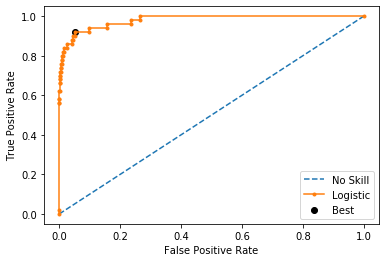

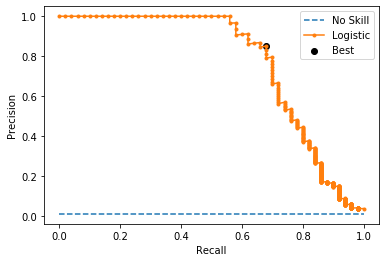

Threshold=0.251, F-Score=0.75556


In [53]:
# roc curve for logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# predict probabilities
yhat = model.predict_proba(testX)

# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

# calculate roc curves
fpr, tpr, j_thresholds = roc_curve(testy, yhat)
# calculate pr-curve
precision, recall, f_thresholds = precision_recall_curve(testy, yhat)

# calculate the g-mean & J statistic for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
J = tpr - fpr
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# custom score


# locate the index of the largest g-mean
ig = np.argmax(gmeans)
ij = np.argmax(J)
ifs = np.argmax(fscore)


print('Best Threshold=%f, G-Mean=%.3f' % (j_thresholds[ig], gmeans[ig]))
print('Best Threshold=%f, J=%.3f' % (j_thresholds[ij], J[ij]))
print('Best Threshold=%f, F-score=%.3f' % (f_thresholds[ifs], fscore[ifs]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# show the plot
plt.show()

# plot the roc curve for the model
no_skill = len(testy[testy==1]) / len(testy)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.scatter(recall[ifs], precision[ifs], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

# define thresholds
thresholds = np.arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(testy, to_labels(yhat, t)) for t in thresholds]

# get best threshold considering F1score
ifs1 = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ifs1], scores[ifs1]))

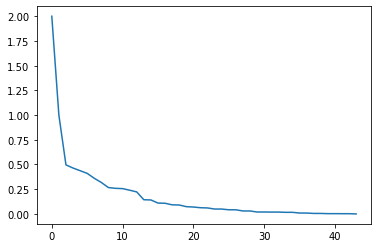

In [23]:
plt.plot(thresholds)

In [15]:
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

In [16]:
gmeans

array([0.        , 0.14142136, 0.74833148, 0.74825588, 0.76150038,
       0.76134649, 0.78716214, 0.78700301, 0.81199343, 0.81191133,
       0.8241212 , 0.82387113, 0.83589908, 0.83513744, 0.84698395,
       0.84612486, 0.8577961 , 0.85736029, 0.868869  , 0.86807345,
       0.8794213 , 0.87870428, 0.88989842, 0.88826241, 0.89929714,
       0.898099  , 0.90898545, 0.90552513, 0.91624177, 0.90728588,
       0.91777509, 0.91641815, 0.92677348, 0.92323542, 0.93343722,
       0.91035347, 0.92019541, 0.88966229, 0.89907697, 0.85666018,
       0.86553773, 0.84855909, 0.85717412, 0.        ])

In [17]:
ix=np.argmax(gmeans)

In [18]:
ix

34

In [19]:
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.016153, G-Mean=0.933


In [21]:
# define a function to make threshold adjustable
def threshold_pred(model, X, threshold=0.1):
    pred = model.predict_proba(X)
    y_pred = pred[:, 1] > threshold
    return y_pred.astype(int)

In [31]:
y_pred = threshold_pred(model, testX, thresholds[ix])

In [32]:
(tn, fp, fn, tp) = confusion_matrix(testy, y_pred).ravel()

In [33]:
tn, fp, fn, tp

(4688, 262, 5, 45)

In [34]:
sensitivity = tp / (tp + fn)
specificity = tn / (fp + tn)
g_calc = np.sqrt(sensitivity * specificity)

In [35]:
g_calc

0.9232354176284813

In [36]:
iy = 15
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[iy], gmeans[iy]))

Best Threshold=0.109726, G-Mean=0.846


In [37]:
y_pred = threshold_pred(model, testX, thresholds[iy])

In [38]:
(tn, fp, fn, tp) = confusion_matrix(testy, y_pred).ravel()

In [39]:
sensitivity = tp / (tp + fn)
specificity = tn / (fp + tn)
g_calc = np.sqrt(sensitivity * specificity)
print(g_calc)

0.8462108054573205


In [ ]:
def custom_score(testy, to_labels(yhat, t)):
    